# d1=3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

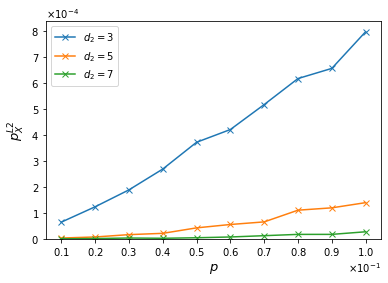

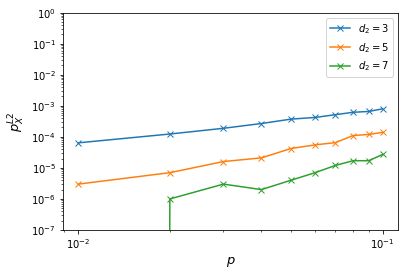

In [21]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()

In [27]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        # 説明変数
        X = np.log10(a).reshape(-1, 1)
        #X = np.log10([a])
        #print(X)
        # 目的変数
        Y = np.log10(b)
        #print(Y)
        # 予測モデルを作成
        clf.fit(X, Y)
        # 回帰係数
        print(clf.coef_)
        # 切片 (誤差)
        print(clf.intercept_)
        # 決定係数
        #print(clf.score(X, Y))
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        # 説明変数
        X = np.log10(a[1:]).reshape(-1, 1)
        #X = np.log10([a])
        #print(X)
        # 目的変数
        Y = np.log10(b[1:])
        #print(Y)
        # 予測モデルを作成
        clf.fit(X, Y)
        # 回帰係数
        print(clf.coef_)
        # 切片 (誤差)
        print(clf.intercept_)
        # 決定係数
        #print(clf.score(X, Y))
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")

[1.38247856]
-1.4522944084424763
[-6.98220864]
[1.04181681e-07] 

[1.92687394]
-1.4376051896364554
[-9.14510096]
[7.15976947e-10] 

[2.66834922]
-1.4058542854614782
[-12.07925116]
[8.3319919e-13] 



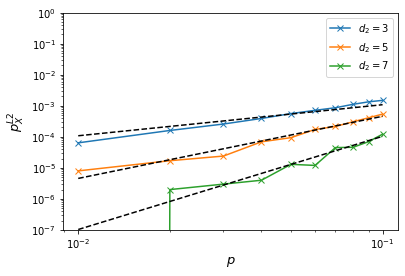

In [30]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b[1:])-(i+1)*np.log10(a[1:]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()
plt.show()

### Zエラー

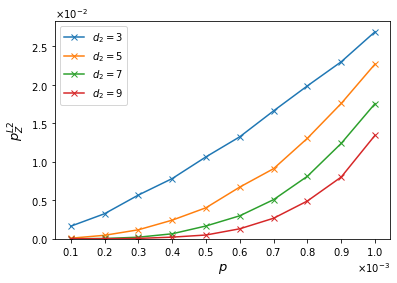

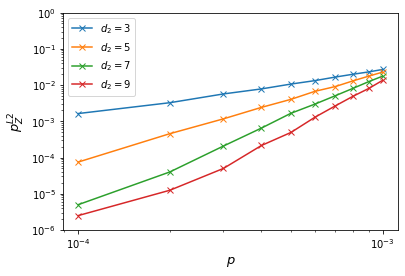

In [7]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-7, 1)
ax.legend()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_13207/2762372890.py:21: RuntimeWarning: divide by zero encountered in log10
  mean = np.mean(np.log10(b)-(i+1)*np.log10(a))


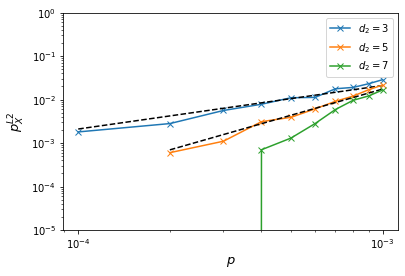

In [21]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[2:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[2:]
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

In [24]:
for i in range(len(code_distance_list)):
    if i == 0:
        b = np.array(data2.loc[code_distance_list[i]])
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 1:
        b = np.array(data2.loc[code_distance_list[i]])[1:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[1:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])[3:]
        a = np.array(p_list)
        a = [float(num) for num in a]
        a = np.array(a)[3:]
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(10**clf.predict([[-4]]),"\n")
        print(code_distance_list[i]*(4*3+6)/10**clf.predict([[-4]]),"\n")

[0.00147632] 

[36577.38773892] 

[0.00011255] 

[799658.84655119] 

[4.40983784e-06] 

[28572479.22387888] 



# d1 = 5

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

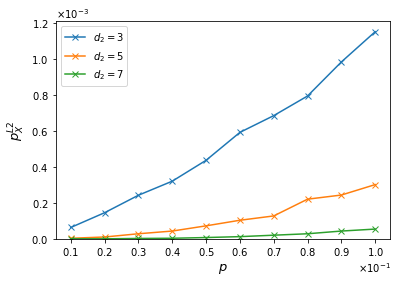

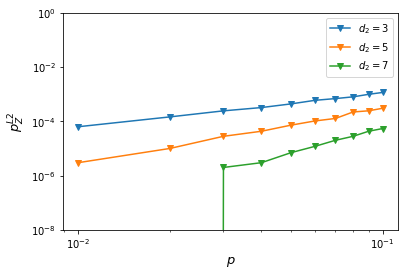

In [23]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 1)
ax.legend()

In [31]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        # 説明変数
        X = np.log10(a).reshape(-1, 1)
        #X = np.log10([a])
        #print(X)
        # 目的変数
        Y = np.log10(b)
        #print(Y)
        # 予測モデルを作成
        clf.fit(X, Y)
        # 回帰係数
        print(clf.coef_)
        # 切片 (誤差)
        print(clf.intercept_)
        # 決定係数
        #print(clf.score(X, Y))
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        # 説明変数
        X = np.log10(a[2:]).reshape(-1, 1)
        #X = np.log10([a])
        #print(X)
        # 目的変数
        Y = np.log10(b[2:])
        #print(Y)
        # 予測モデルを作成
        clf.fit(X, Y)
        # 回帰係数
        print(clf.coef_)
        # 切片 (誤差)
        print(clf.intercept_)
        # 決定係数
        #print(clf.score(X, Y))
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")

[1.38247856]
-1.4522944084424763
[-6.98220864]
[1.04181681e-07] 

[1.92687394]
-1.4376051896364554
[-9.14510096]
[7.15976947e-10] 

[3.1755265]
-0.818326822341966
[-13.52043281]
[3.01694357e-14] 



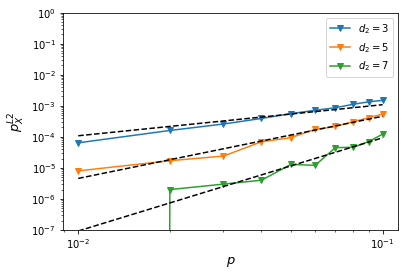

In [33]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b[2:])-(i+1)*np.log10(a[2:]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()
plt.show()

40837.69633508067
722222.2222222221
10399999.999999998
inf


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_67329/232149479.py:42: RuntimeWarning: divide by zero encountered in true_divide
  print(code_distance_list[i]*(4*5+6)/b[0])


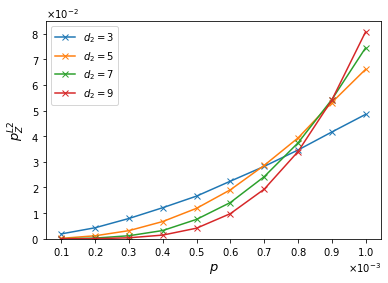

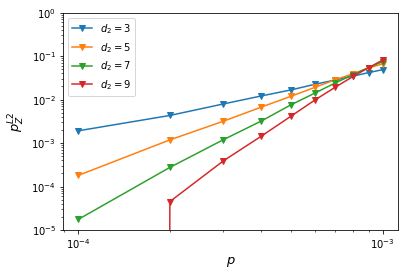

In [8]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_67329/1588926067.py:4: RuntimeWarning: divide by zero encountered in log10
  mean = np.mean(np.log10(b)-(i+1)*np.log10(a))


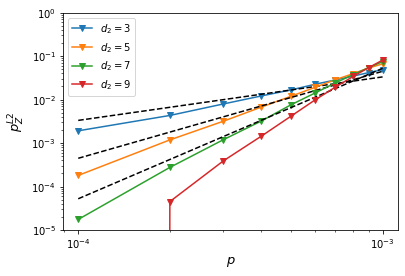

In [9]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()

# d1 = 7

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

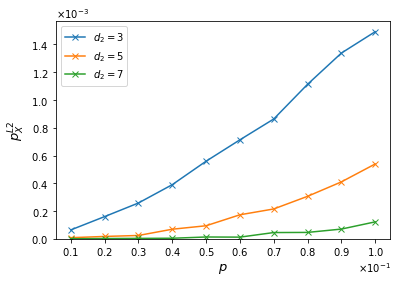

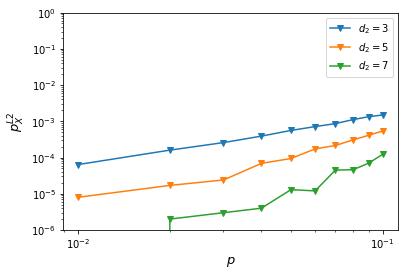

In [25]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "X error,N=1,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 1)
ax.legend()

In [36]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print(clf.coef_)
        print(clf.intercept_)
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a[1:]).reshape(-1, 1)
        Y = np.log10(b[1:])
        clf.fit(X, Y)
        print(clf.coef_)
        print(clf.intercept_)
    
        print(clf.predict([[-4]]))
        print(10**clf.predict([[-4]]),"\n")

[1.38247856]
-1.4522944084424763
[-6.98220864]
[1.04181681e-07] 

[1.92687394]
-1.4376051896364554
[-9.14510096]
[7.15976947e-10] 

[2.66834922]
-1.4058542854614782
[-12.07925116]
[8.3319919e-13] 



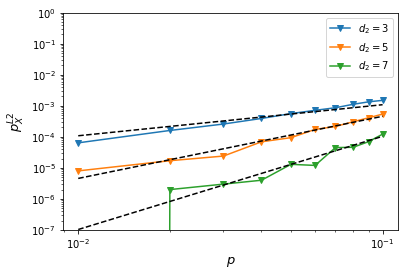

In [37]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        mean = np.mean(np.log10(b[1:])-(i+1)*np.log10(a[1:]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
        ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()
plt.show()

44155.84415584607
422360.24844720494
3661538.4615384596
40800000.0


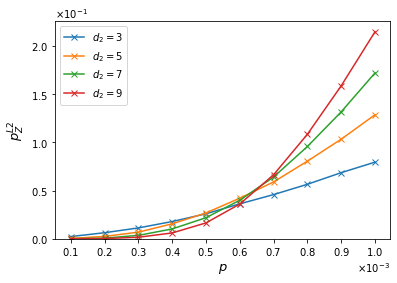

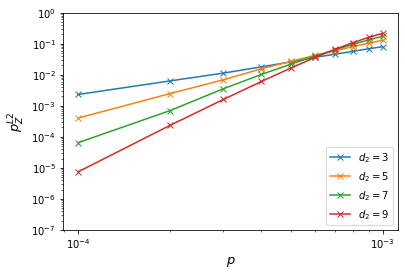

In [38]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=7,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()


fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*7+6)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000001, 1)
ax.legend()

### fitting

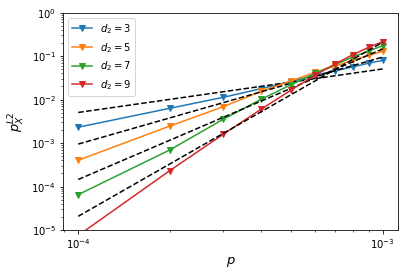

In [18]:
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    mean = np.mean(np.log10(b)-(i+1)*np.log10(a))
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    ax.plot(a, 10**mean*a**(i+1),marker='',color='k',linestyle="dashed")
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
plt.show()